In [3]:
#농어의 길이와 무게
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])
print(len(perch_length),len(perch_weight))

56 56


In [5]:
from sklearn.model_selection import train_test_split

#농어데이터를 훈련데이터와 테스트데이터로 나눔
train_input,test_input,train_target,test_target = train_test_split(perch_length,perch_weight,random_state=42)

#훈련데이터와 테스트데이터를 2차원 배열로 생성
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)
print(train_input.shape,test_input.shape)

(42, 1) (14, 1)


In [6]:
#K-최근접 이웃 회귀 모델 생성
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input,train_target)

#길이가 50인 농어의 무게 예측
print(knr.predict([[50]]))

[1033.33333333]


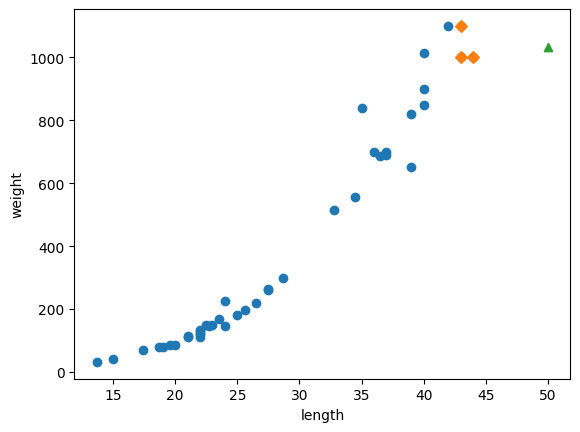

In [7]:
#길이가 50인 농어(무게를 1033로 예측)를 산점도에 표시
import matplotlib.pyplot as plt

#길이 50인 농어의 이웃 탐색
distances,indexes = knr.kneighbors([[50]])
plt.scatter(train_input,train_target)
plt.scatter(train_input[indexes],train_target[indexes],marker='D')
plt.scatter(50,1033,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [8]:
#길이가 50인 농어의 이웃들의 평균
print(np.mean(train_target[indexes]))

1033.3333333333333


In [9]:
#길이가 100인 농어의 무게 예측 => 길이가 50인 농어의 무게 예측함. 왜?
print(knr.predict([[100]]))

[1033.33333333]


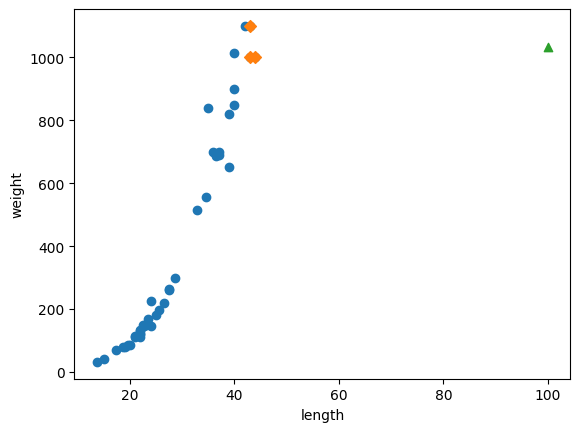

In [11]:
#길이가 100인 농어의 이웃 탐색 및 산점도
distances,indexes = knr.kneighbors([[100]])
plt.scatter(train_input,train_target)
plt.scatter(train_input[indexes],train_target[indexes],marker='D')
plt.scatter(100,1033,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [14]:
#선형회귀모델을 생성하고 길이가 50인 농어의 무게 예측
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_input,train_target)
lr.predict([[50]])

array([1241.83860323])

In [15]:
#선형회귀는 훈련데이터와 가장 적합한 직선을 구하는 알고리즘
#직선의 방정식 y = ax + b에서 계수(a)와 절편(b)을 구함, y는 예측하려는 값(무게), x는 입력(길이)
print(lr.coef_,lr.intercept_)

[39.01714496] -709.0186449535477


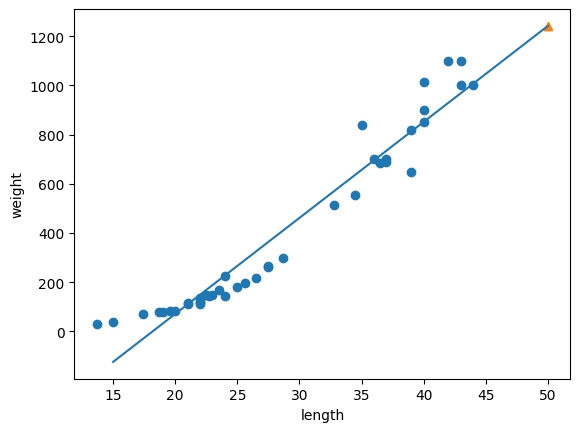

In [16]:
#농어의 길이를 15-50까지 증가시키며 그때의 무게를 산점도로 표현
#선형회귀에서 구한 학습파라미터 coef_와 intercept_를 이용하여 무게 구함 => 무게 = 39*길이 - 709
plt.scatter(train_input,train_target)
plt.plot([15,50],[lr.coef_*15+lr.intercept_,lr.coef_*50+lr.intercept_])
plt.scatter(50,lr.coef_*50+lr.intercept_,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [24]:
#선형회귀 모델의 성능 => 개선필요(길이가 짧아지면 무게가 0이 되는 경우 생김 => 그래프 왼쪽 하단)
print(lr.score(train_input,train_target))
print(lr.score(test_input,test_target))

0.939846333997604
0.8247503123313558


In [25]:
#다항식을 이용한 다항회귀
#y = a*길이의 제곱 + b*길이 + c
#np.column_stack을 이용하여 [길이의 제곱, 길이]형태로 데이터 생성
train_poly = np.column_stack((train_input**2,train_input))
test_poly = np.column_stack((test_input**2,test_input))
print(train_poly.shape,test_poly.shape)

(42, 2) (14, 2)


In [26]:
#다항회귀 모델 생성하고 길이가 50인 농어의 무게 예측
plr = LinearRegression()
plr.fit(train_poly,train_target)
print(plr.predict([[50**2,50]]))

[1573.98423528]


In [27]:
#다항회귀모델의 파라미터: coef_와 intercept_
print(plr.coef_,plr.intercept_)

[  1.01433211 -21.55792498] 116.0502107827827


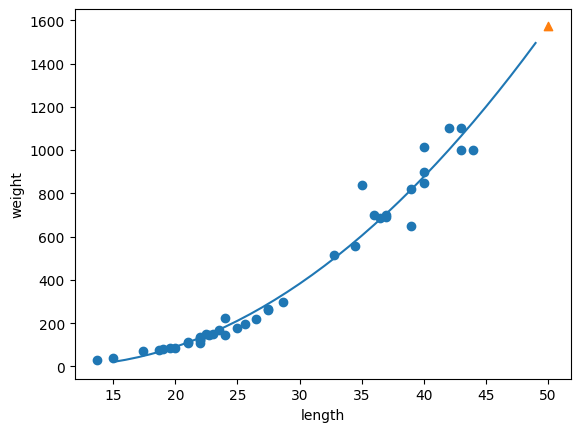

In [30]:
#직선을 그리기 위해 15-49까지의 배열 생성
point = np.arange(15,50)
#훈련데이터의 산점도
plt.scatter(train_input,train_target)
#15-49까지의 2차 방정식 그래프
plt.plot(point,plr.coef_[0]*point**2+plr.coef_[1]*point+plr.intercept_)
#길이가 50인 농어데이터
plt.scatter(50,plr.predict([[50**2,50]]),marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [31]:
#다항회귀 모델의 성능 => 과소적합 문제 존재 => 좀 더 복잡한 모델의 설게 필요
print(plr.score(train_poly,train_target))
print(plr.score(test_poly,test_target))

0.9706807451768623
0.9775935108325122


In [18]:
#농어데이터
#https://bit.ly/perch._csv_data
#pandas 라이브러리 이용해서 다운로드
import pandas as pd
df = pd.read_csv('https://bit.ly/perch._csv_data')
#print(df)
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [23]:
#판다스 구조
print(df.index,df.columns,df.shape)
#df['length']
#df.loc[:5, 'length']   #5까지 읽어옴
df.iloc[:5, 0]   #5전까지 읽어옴

RangeIndex(start=0, stop=56, step=1) Index(['length', ' height', ' width'], dtype='object') (56, 3)


0     8.4
1    13.7
2    15.0
3    16.2
4    17.4
Name: length, dtype: float64